# Ensemble Techniques And Its Types-4
Build a random forest classifier to predict the risk of heart disease based on a dataset of patient
information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type,
resting blood pressure, serum cholesterol, and maximum heart rate achieved.
Dataset link: https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view?usp=share_link

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the numerical features if necessary.


In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
## handling missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There is no missing values in our dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


we dont need to use encoding here already feartures ar encoded.

In [6]:
## dependent and independent variables
X = df.drop(['target'], axis = 1)
y = df['target']

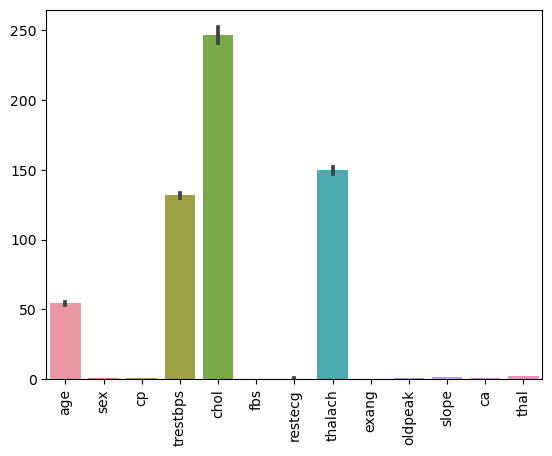

In [7]:
sns.barplot(X)
plt.xticks(rotation ='vertical')
plt.show()

In [8]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

Now our values has been scaled down 

### Q2. Split the dataset into a training set (70%) and a test set (30%).


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

### Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each tree. Use the default values for other hyperparameters.


In [10]:
## model training
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, max_depth=10)

In [11]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

### Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.


In [12]:
## Predicting
y_pred = rfc.predict(X_test)

In [13]:
# calculating scores
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('precision_score\n', precision_score(y_test, y_pred))
print('accuracy_score\n', accuracy_score(y_test, y_pred))
print('recall_score\n', recall_score(y_test, y_pred))
print('f1_score\n', f1_score(y_test, y_pred))

precision_score
 0.8604651162790697
accuracy_score
 0.8131868131868132
recall_score
 0.7708333333333334
f1_score
 0.8131868131868132


### Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart disease risk. Visualise the feature importances using a bar chart.


In [14]:
importances = rfc.feature_importances_ # Get the feature importances
indices = np.argsort(importances)[::-1] # Sort the features by importance score


In [15]:
# Print the top 5 most important features
list1 = []
for f in range(X_train.shape[1]):
    list1.append((f"{f + 1}. {df.columns[indices[f]]} ({importances[indices[f]]:.4f})"))


In [16]:
list1[:5]

['1. ca (0.1328)',
 '2. thalach (0.1233)',
 '3. cp (0.1179)',
 '4. oldpeak (0.1151)',
 '5. thal (0.0981)']

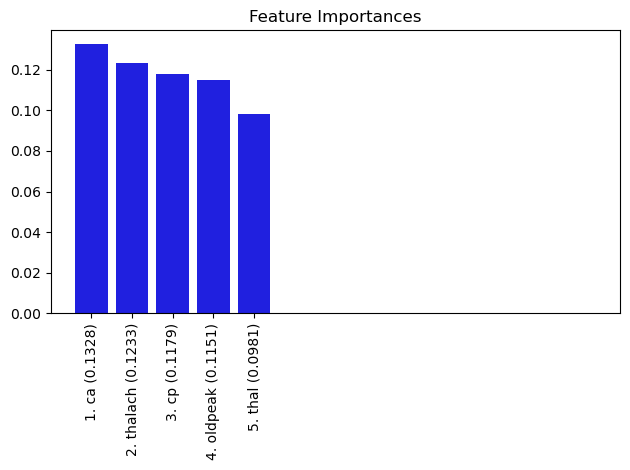

In [17]:
plt.title("Feature Importances")
sns.barplot(x = list1[:5], y = importances[indices[:5]], color="b")
plt.xticks(rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

### Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try different values of the number of trees, maximum depth, minimum samples split, and minimum samples leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.


In [18]:
from sklearn.model_selection import GridSearchCV, KFold

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [19]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)
rfc_grid = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv = cv)

In [20]:
rfc_grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]})

In [21]:
print(f'Best hyperparameters: {rfc_grid.best_params_}')
print(f'Best mean cross-validation score: {rfc_grid.best_score_:.3f}')

Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 150}
Best mean cross-validation score: 0.840


### Q7. Report the best set of hyperparameters found by the search and the corresponding performance metrics. Compare the performance of the tuned model with the default model.


In [22]:
y_pred1 = rfc_grid.predict(X_test)
print('precision_score\n', precision_score(y_test, y_pred1))
print('accuracy_score\n', accuracy_score(y_test, y_pred1))
print('recall_score\n', recall_score(y_test, y_pred1))
print('f1_score\n', f1_score(y_test, y_pred1))

precision_score
 0.8444444444444444
accuracy_score
 0.8131868131868132
recall_score
 0.7916666666666666
f1_score
 0.8172043010752689


As we comparing our both models default and tunned with each other we can say that our tunned models works better with compare to default model